In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
try:
  import coffea
except ImportError as e:
  !pip install coffea
  import coffea
print (coffea.__version__)

0.7.21


In [3]:
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import hist
import mplhep as hep

print (uproot.__version__)
print (ak.__version__)

4.3.7
1.10.3


In [4]:
%time
!wget -nc --no-check-certificate -O DoubleMuonUL2016G.root https://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 15.3 µs
--2024-11-04 22:51:25--  https://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root
Resolving eospublic.cern.ch (eospublic.cern.ch)... 128.142.160.145, 2001:1458:301:17::100:e
Connecting to eospublic.cern.ch (eospublic.cern.ch)|128.142.160.145|:443... connected.
HTTP request sent, awaiting response... 307 TEMPORARY_REDIRECT
Location: http://p06636710n61641.cern.ch:8443/eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root?encURI=%26cap.sym%3Dq%2BCUHEBX8oAEqtPu2nHLfSuxInA%3D%26cap.msg%3DQHtGNWO287qHIYzxGIORRghAXLvb9ZznlpHRAWQBQjrvMHndOOHyr5qnLo5IKSgF3c0cTK1PG2ZnHNkKhNR9kpW7g26yIqObVR%2Br7d2%2F%2BSuKcFF5VaEuiP%2BGty5Rnk19lM1wlIW%2B8ITnCV2U7ZnhsWGY9bw8NxZXOAKUo%2BYNdz1VfVOAmS5hiKwGqLXAt6VxnK11YBOmypFeUfQJSzV%2Fk3cAo0PsitPDe1BQa8ljaOESe6t%2BQ0QwfAyMEYSRxsVT6EK6R

In [5]:
!wget -nc https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
!wget -nc https://raw.githubusercontent.com/elizamelo/LumiOpenData/main/lumi_mask.py

--2024-11-04 22:56:41--  https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11686 (11K) [text/plain]
Saving to: ‘Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt’

Cert_271036-284044_ 100%[===================>]  11.41K  --.-KB/s    in 0.003s  

2024-11-04 22:56:41 (4.16 MB/s) - ‘Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt’ saved [11686/11686]

--2024-11-04 22:56:42--  https://raw.githubusercontent.com/elizamelo/LumiOpenData/main/lumi_mask.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting r

In [6]:
import lumi_mask
from lumi_mask import build_lumi_mask

In [7]:
data = uproot.open("DoubleMuonUL2016G.root")

In [8]:
data.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [9]:
data.classnames()

{'tag;1': 'TObjString',
 'Events;1': 'TTree',
 'LuminosityBlocks;1': 'TTree',
 'Runs;1': 'TTree',
 'MetaData;1': 'TTree',
 'ParameterSets;1': 'TTree'}

In [12]:
tree = data['Events;1']

In [13]:
tree

<TTree 'Events' (1370 branches) at 0x7fda5609be80>

In [14]:
nevents = tree.num_entries

print(f"{nevents = }")

nevents = 2986904


In [15]:
keys = tree.keys()
keys

['run',
 'luminosityBlock',
 'event',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_jetIdx',
 'boostedTau_rawAntiEleCat2018',
 'boostedTau_idAntiEle2018',
 'boostedTau_idAntiMu',
 'boostedTau_idMVAnewDM2017v2',
 'boostedTau_idMVAoldDM2017v2',
 'boostedTau_idMVAoldDMdR032017v2',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_ra

In [16]:
print(tree['Muon_pt'].array() > 20)

[[False], [False, False], [True, False], ... [False, False], [True, True, False]]


In [17]:
ak.num(tree['Muon_pt'].array()) == 2

<Array [False, True, True, ... True, False] type='2986904 * bool'>

In [18]:
#variáveis cinemáticas dos múons
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()
muon_phi = tree['Muon_phi'].array()
muon_mass = tree['Muon_mass'].array()

In [19]:
hlt_isomu24 = tree['HLT_IsoMu24'].array()
nmuon = tree['nMuon'].array()  
muon_charge = tree['Muon_charge'].array()
muon_tightid = tree['Muon_tightId'].array()

In [20]:
print(tree['Muon_pt'].array())
print(nmuon)
print(muon_pt)

[[5.61], [11.8, 7.36], [33.6, 12.6], ... 5], [19.1, 17.8], [33.8, 28.4, 3.21]]
[1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 4, 2, 2, ... 2, 1, 1, 2, 2, 2, 2, 3, 2, 1, 4, 2, 3]
[[5.61], [11.8, 7.36], [33.6, 12.6], ... 5], [19.1, 17.8], [33.8, 28.4, 3.21]]


In [21]:
num_mu = ak.num(muon_charge[:5])  
print(num_mu)
print(type(muon_charge))  
print(ak.to_list(muon_charge[:5]))
print(ak.type(muon_charge)) 

[1, 2, 2, 2, 2]
<class 'awkward.highlevel.Array'>
[[-1], [1, 1], [1, -1], [-1, 1], [1, 1]]
2986904 * var * int32


In [31]:
num_events_initial = len(nmuon)
print(f"Número inicial de eventos: {num_events_initial}")

# 3.2
# Seleção do trigger
cut_trigger = (hlt_isomu24 == True)
#cut_trigger = (hlt_isomu27 == True)
num_events_after_trigger = ak.sum(cut_trigger)
print(f"Número de eventos após o corte de trigger: {num_events_after_trigger}")

# 3.3
# Seleção do ID de múons
cut_id = (muon_tightid == True)
cut_id_all = ak.all(cut_id, axis=1)  # Todos os múons do evento precisam passar no corte
num_events_after_id_all = ak.sum(cut_id_all)
print(f"Número de eventos após o corte do muon ID: {num_events_after_id_all}")

# Aplicar os cortes: trigger + ID em nível de evento
cut_id_trigger = cut_trigger & cut_id_all
num_events_after_id_trigger = ak.sum(cut_id_trigger)
print(f"Número de eventos após os cortes de trigger e ID: {num_events_after_id_trigger}")

# 3.4
# Seleção do número de múons (número de múons = 2)
cut_nmuons = (nmuon == 2)
num_events_after_nmuons = ak.sum(cut_nmuons)
print(f"Número de eventos após o corte de número de múons (= 2): {num_events_after_nmuons}")

# Aplicar o corte do trigger, ID e do número de múons
cut_nmuons_id_trigger = cut_id_trigger & cut_nmuons
num_events_after_nmuons_id_trigger = ak.sum(cut_nmuons_id_trigger)
print(f"Número de eventos após o corte de número de múons (= 2), trigger e ID: {num_events_after_nmuons_id_trigger}")

# 3.5
# Seleção de múons de cargas opostas
# Usando ak.combinations para verificar múons de cargas opostas
muon_pairs = ak.combinations(muon_charge, 2, axis=1)  # Cria pares de múons
cut_osmuons = (muon_pairs['0'] != muon_pairs['1'])  # Verifica se as cargas são opostas
cut_osmuons_any = ak.any(cut_osmuons, axis=1)  # Pelo menos um par de cargas opostas por evento

num_events_after_osmuons = ak.sum(cut_nmuons_id_trigger & cut_osmuons_any)
print(f"Número de eventos após o corte de cargas opostas: {num_events_after_osmuons}")

# 3.6
# Combinação de todas as máscaras, incluindo os "good runs"
cut_combined = cut_id_trigger & cut_nmuons & cut_osmuons_any 
num_events_after_combined = ak.sum(cut_combined)
print(f"Número de eventos após todos os cortes (combinação completa): {num_events_after_combined}")


Número inicial de eventos: 2986904
Número de eventos após o corte de trigger: 576952
Número de eventos após o corte do muon ID: 1659303
Número de eventos após os cortes de trigger e ID: 444900
Número de eventos após o corte de número de múons (= 2): 1645199
Número de eventos após o corte de número de múons (= 2), trigger e ID: 415107


/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/awkward/_util.py:1172: ResourceWarning: unclosed file <_io.FileIO name='Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt' mode='rb' closefd=True>
  out = apply(broadcast_pack(inputs, isscalar), 0, user)


Número de eventos após o corte de cargas opostas: 406846
Número de eventos após todos os cortes (combinação completa): 406846


In [32]:
# Agora, vamos aplicar todos os cortes nos objetos (múons), você pode verificar os arrays selecionados
muon_pt_sel = muon_pt[cut_combined]
muon_eta_sel = muon_eta[cut_combined]
muon_phi_sel = muon_phi[cut_combined]
muon_mass_sel = muon_mass[cut_combined]
nmu_sel = nmuon[cut_combined]

In [33]:
print('Input:', muon_pt)
print('Output:', muon_pt[cut_combined])
print('Output:', muon_pt_sel)

Input: [[5.61], [11.8, 7.36], [33.6, 12.6], ... 5], [19.1, 17.8], [33.8, 28.4, 3.21]]
Output: [[52.6, 42.8], [50.2, 38.6], [53.7, 24.2, ... 35.3], [35.5, 34.7], [63.6, 35.2]]
Output: [[52.6, 42.8], [50.2, 38.6], [53.7, 24.2, ... 35.3], [35.5, 34.7], [63.6, 35.2]]


In [34]:
# Contagem
#num_events_after_cut = ak.count(muon_pt_sel, axis=0)
num_events_after_precut = len(muon_pt_sel)
num_mu_after_precut = ak.count(muon_pt_sel, axis=-1)
print(f"Número de eventos após os cortes e filtragem: {num_events_after_precut}")
print(f"Número de eventos selecionados: {ak.sum(cut_combined)}")
print(f"Número de múons por eventos após os cortes: {num_mu_after_precut}")

Número de eventos após os cortes e filtragem: 406846
Número de eventos selecionados: 406846
Número de múons por eventos após os cortes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


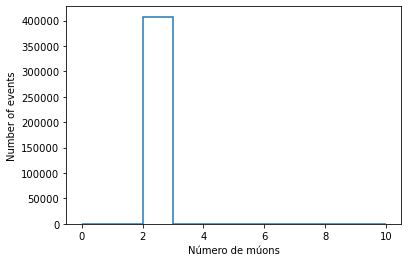

In [35]:
import hist
h = hist.Hist(hist.axis.Regular(10, 0, 10, label='Número de múons'))
h.fill(nmu_sel)
h.plot()
plt.ylabel('Number of events')
plt.show()

In [36]:
muons = ak.zip({
     "pt": muon_pt[cut_combined],
     "eta": muon_eta[cut_combined],
     "phi": muon_phi[cut_combined],
     "mass": muon_mass[cut_combined]},

    )

In [37]:
muons.fields

['pt', 'eta', 'phi', 'mass']

In [38]:
# Printando as componentes dos muons
print("pt:", muons.pt)
print("eta:", muons.eta)
print("phi:", muons.phi)
print("mass:", muons.mass)

pt: [[52.6, 42.8], [50.2, 38.6], [53.7, 24.2, ... 35.3], [35.5, 34.7], [63.6, 35.2]]
eta: [[-1.43, -1.9], [-0.656, -1.01], [0.16, ... 1.65], [1.57, -0.0325], [-2.31, -1.91]]
phi: [[-2.72, 1.17], [1.63, -1.71], [-1.95, 1.25, ... -0.837], [0.23, 3], [1.69, -2.11]]
mass: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]


In [39]:
print(len(muons.pt))

406846


In [40]:
muon1_pt = muons.pt[:, 0]  # Primeiro múon
muon2_pt = muons.pt[:, 1]  # Segundo múon

muon1_eta = muons.eta[:, 0]
muon2_eta = muons.eta[:, 1]

muon1_phi = muons.phi[:, 0]
muon2_phi = muons.phi[:, 1]

muon1_mass = muons.mass[:, 0]
muon2_mass = muons.mass[:, 1]

In [41]:
print("Muon 1 (mais energético):")
print("  pt:", muon1_pt)
print("  eta:", muon1_eta)
print("  phi:", muon1_phi)
print("  mass:", muon1_mass)

print("Muon 2:")
print("  pt:", muon2_pt)
print("  eta:", muon2_eta)
print("  phi:", muon2_phi)
print("  mass:", muon2_mass)

Muon 1 (mais energético):
  pt: [52.6, 50.2, 53.7, 48.5, 43.3, 32, 42.6, ... 32.1, 49.1, 85.7, 43.7, 35.5, 63.6]
  eta: [-1.43, -0.656, 0.16, -1.8, -0.0617, -2.17, ... -1.78, -0.557, 0.843, 1.57, -2.31]
  phi: [-2.72, 1.63, -1.95, 1.4, 1.38, -1.63, ... -0.828, -0.0387, -2.2, 2.76, 0.23, 1.69]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, 0.106, ... 0.106, 0.106, 0.106, 0.106, 0.106]
Muon 2:
  pt: [42.8, 38.6, 24.2, 35.4, 39.6, 8.37, 31.3, ... 30.3, 39.4, 42.4, 35.3, 34.7, 35.2]
  eta: [-1.9, -1.01, -1.3, -0.883, 0.787, -1.5, ... -1.73, -0.525, 1.65, -0.0325, -1.91]
  phi: [1.17, -1.71, 1.25, -1.84, -1.75, -3, -1.51, ... 0.99, 2.64, 1.12, -0.837, 3, -2.11]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, 0.106, ... 0.106, 0.106, 0.106, 0.106, 0.106]


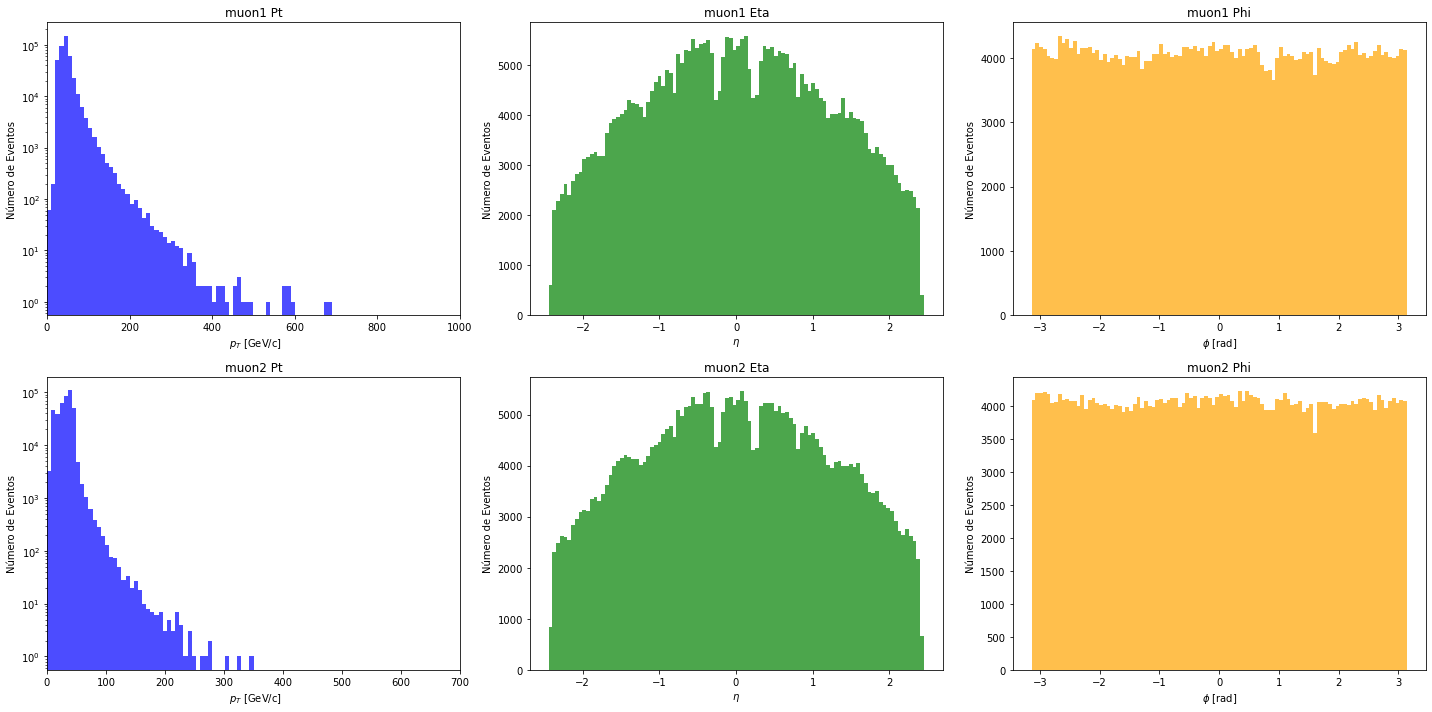

In [47]:
import matplotlib.pyplot as plt

# Criar os plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Configuração do subplot para o muon1
axes[0, 0].hist(muon1_pt, bins=100, range=(0, 1000), color='blue', alpha=0.7)
axes[0, 0].set_title('muon1 Pt')
axes[0, 0].set_xlabel(r' $p_T$ [GeV/c]')
axes[0, 0].set_ylabel('Número de Eventos')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(0, 1000.0)

axes[0, 1].hist(muon1_eta, bins=100, color='green', alpha=0.7)
axes[0, 1].set_title('muon1 Eta')
axes[0, 1].set_xlabel(r'$\eta$')
axes[0, 1].set_ylabel('Número de Eventos')

axes[0, 2].hist(muon1_phi, bins=100, color='orange', alpha=0.7)
axes[0, 2].set_title('muon1 Phi')
axes[0, 2].set_xlabel(r'$\phi$ [rad]')
axes[0, 2].set_ylabel('Número de Eventos')

# Configuração do subplot para o muon2
axes[1, 0].hist(muon2_pt, bins=100, range=(0.25, 700), color='blue', alpha=0.7)
axes[1, 0].set_title('muon2 Pt')
axes[1, 0].set_xlabel(r' $p_T$ [GeV/c]')
axes[1, 0].set_ylabel('Número de Eventos')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(0.0, 700.0)

axes[1, 1].hist(muon2_eta, bins=100, color='green', alpha=0.7)
axes[1, 1].set_title('muon2 Eta')
axes[1, 1].set_xlabel(r'$\eta$')
axes[1, 1].set_ylabel('Número de Eventos')

axes[1, 2].hist(muon2_phi, bins=100, color='orange', alpha=0.7)
axes[1, 2].set_title('muon2 Phi')
axes[1, 2].set_xlabel(r'$\phi$ [rad]')
axes[1, 2].set_ylabel('Número de Eventos')

# Ajustar layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [48]:
# Criar máscaras para as condições de cada mu
mask_mu1 = (muon1_pt > 12.0) & (np.abs(muon1_eta) < 2.4)
mask_mu2 = (muon2_pt > 4.0) & (np.abs(muon2_eta) < 2.4)

cut_cinematico_muons = (mask_mu1 & mask_mu2)

In [49]:
muon1_pt_cut = muon1_pt[cut_cinematico_muons]
muon2_pt_cut = muon2_pt[cut_cinematico_muons]

muon1_eta_cut = muon1_eta[cut_cinematico_muons]
muon2_eta_cut = muon2_eta[cut_cinematico_muons]

muon1_phi_cut = muon1_phi[cut_cinematico_muons]
muon2_phi_cut = muon2_phi[cut_cinematico_muons]

muon1_mass_cut = muon1_mass[cut_cinematico_muons]
muon2_mass_cut = muon2_mass[cut_cinematico_muons]

In [50]:
print("Muon 1:")
print("  pt:", muon1_pt_cut)
print("  eta:", muon1_eta_cut)
print("  phi:", muon1_phi_cut)
print("  mass:", muon1_mass_cut)

print("Muon 2:")
print("  pt:", muon2_pt_cut)
print("  eta:", muon2_eta_cut)
print("  phi:", muon2_phi_cut)
print("  mass:", muon2_mass_cut)

Muon 1:
  pt: [52.6, 50.2, 53.7, 48.5, 43.3, 32, 42.6, ... 32.1, 49.1, 85.7, 43.7, 35.5, 63.6]
  eta: [-1.43, -0.656, 0.16, -1.8, -0.0617, -2.17, ... -1.78, -0.557, 0.843, 1.57, -2.31]
  phi: [-2.72, 1.63, -1.95, 1.4, 1.38, -1.63, ... -0.828, -0.0387, -2.2, 2.76, 0.23, 1.69]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, 0.106, ... 0.106, 0.106, 0.106, 0.106, 0.106]
Muon 2:
  pt: [42.8, 38.6, 24.2, 35.4, 39.6, 8.37, 31.3, ... 30.3, 39.4, 42.4, 35.3, 34.7, 35.2]
  eta: [-1.9, -1.01, -1.3, -0.883, 0.787, -1.5, ... -1.73, -0.525, 1.65, -0.0325, -1.91]
  phi: [1.17, -1.71, 1.25, -1.84, -1.75, -3, -1.51, ... 0.99, 2.64, 1.12, -0.837, 3, -2.11]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, 0.106, ... 0.106, 0.106, 0.106, 0.106, 0.106]


In [52]:
num_events_after_cuts = (len(muon1_pt_cut))
print(f"Número de eventos após o corte de trigger: {num_events_after_cuts}")

Número de eventos após o corte de trigger: 403907


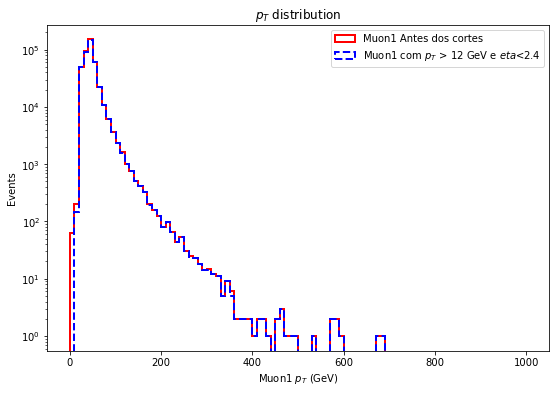

In [55]:
plt.figure(figsize=(9,6))
plt.hist(muon1_pt, bins=100, range=[0,1000], histtype='step',linewidth=2, color='red', label='Muon1 Antes dos cortes')
plt.hist(muon1_pt_cut, bins=100, range=[0,1000], histtype='step',linewidth=2, color='blue',linestyle='--', label='Muon1 com $p_T$ > 12 GeV e $eta$<2.4')
plt.legend()
plt.title('$p_T$ distribution')
plt.xlabel(r'Muon1 $p_T$ (GeV)')
plt.ylabel('Events')
plt. yscale('log')

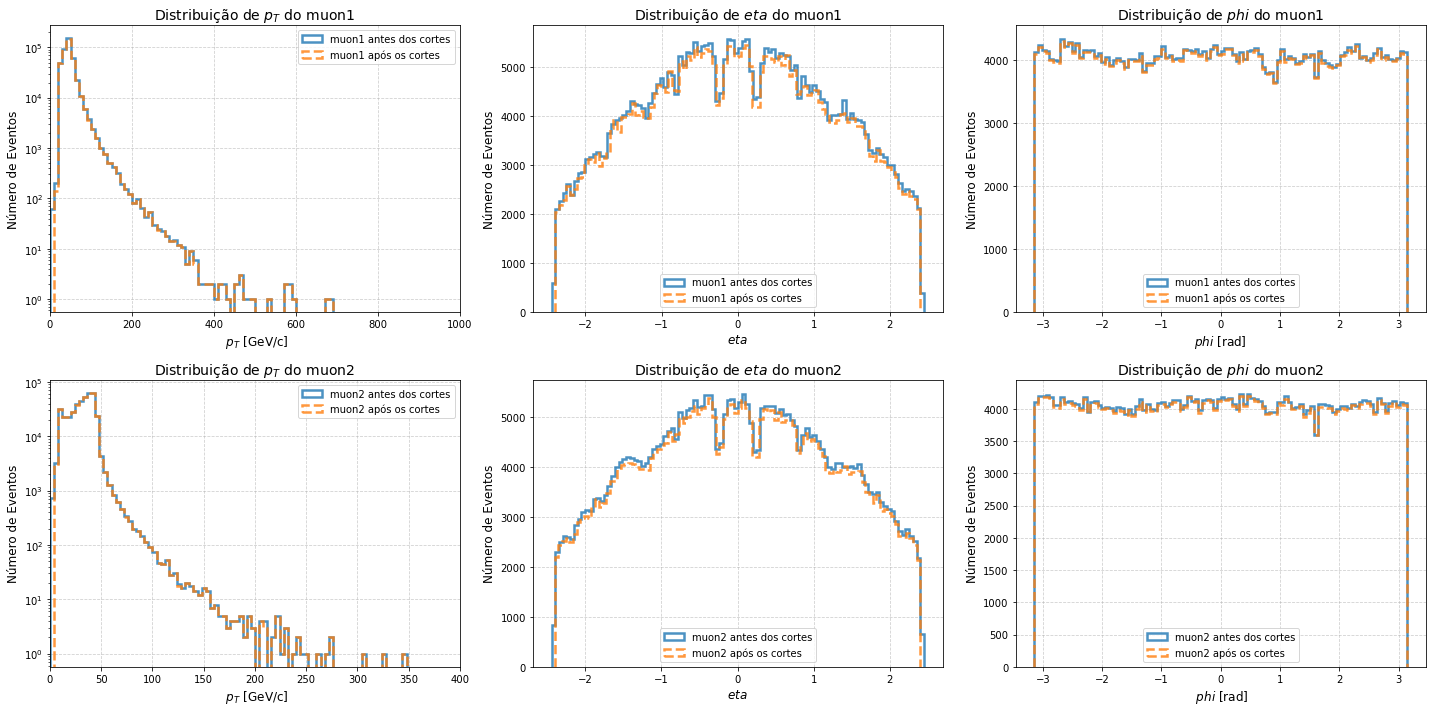

In [56]:
import matplotlib.pyplot as plt

# Criar os plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Configuração das cores
color_before = '#1f77b4'  # Azul suave
color_after = '#ff7f0e'   # Laranja suave

# Configuração do subplot para o muon1_pt
axes[0, 0].hist(muon1_pt, bins=100, range=(0, 1000), histtype='step', linewidth=2.5, color=color_before, label='muon1 antes dos cortes', alpha=0.8)
axes[0, 0].hist(muon1_pt_cut, bins=100, range=(0, 1000), histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon1 após os cortes', alpha=0.8)
axes[0, 0].set_title('Distribuição de $p_{T}$ do muon1', fontsize=14)
axes[0, 0].set_xlabel(r' $p_{T}$ [GeV/c]', fontsize=12)
axes[0, 0].set_ylabel('Número de Eventos', fontsize=12)
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(0, 1000.0)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon1_eta
axes[0, 1].hist(muon1_eta, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon1 antes dos cortes', alpha=0.8)
axes[0, 1].hist(muon1_eta_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon1 após os cortes', alpha=0.8)
axes[0, 1].set_title('Distribuição de $eta$ do muon1', fontsize=14)
axes[0, 1].set_xlabel(r'$eta$', fontsize=12)
axes[0, 1].set_ylabel('Número de Eventos', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon1_phi
axes[0, 2].hist(muon1_phi, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon1 antes dos cortes', alpha=0.8)
axes[0, 2].hist(muon1_phi_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon1 após os cortes', alpha=0.8)
axes[0, 2].set_title('Distribuição de $phi$ do muon1', fontsize=14)
axes[0, 2].set_xlabel(r'$phi$ [rad]', fontsize=12)
axes[0, 2].set_ylabel('Número de Eventos', fontsize=12)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon2_pt
axes[1, 0].hist(muon2_pt, bins=100, range=(0, 400), histtype='step', linewidth=2.5, color=color_before, label='muon2 antes dos cortes', alpha=0.8)
axes[1, 0].hist(muon2_pt_cut, bins=100, range=(0, 400), histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon2 após os cortes', alpha=0.8)
axes[1, 0].set_title('Distribuição de $p_{T}$ do muon2', fontsize=14)
axes[1, 0].set_xlabel(r' $p_{T}$ [GeV/c]', fontsize=12)
axes[1, 0].set_ylabel('Número de Eventos', fontsize=12)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(0.0, 400.0)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon2_eta
axes[1, 1].hist(muon2_eta, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon2 antes dos cortes', alpha=0.8)
axes[1, 1].hist(muon2_eta_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon2 após os cortes', alpha=0.8)
axes[1, 1].set_title('Distribuição de $eta$ do muon2', fontsize=14)
axes[1, 1].set_xlabel(r'$eta$', fontsize=12)
axes[1, 1].set_ylabel('Número de Eventos', fontsize=12)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon2_phi
axes[1, 2].hist(muon2_phi, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon2 antes dos cortes', alpha=0.8)
axes[1, 2].hist(muon2_phi_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon2 após os cortes', alpha=0.8)
axes[1, 2].set_title('Distribuição de $phi$ do muon2', fontsize=14)
axes[1, 2].set_xlabel(r' $phi$ [rad]', fontsize=12)
axes[1, 2].set_ylabel('Número de Eventos', fontsize=12)
axes[1, 2].legend(fontsize=10)
axes[1, 2].grid(True, linestyle='--', alpha=0.6)

# Ajustar layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [57]:
muon1_4vecs = vector.zip({
    "pt": muon1_pt_cut,
    "eta": muon1_eta_cut,
    "phi": muon1_phi_cut,
    "mass": muon1_mass_cut
})

In [58]:
muon1_4vecs

<MomentumArray4D [{rho: 52.6, ... tau: 0.106}] type='403907 * Momentum4D["rho": ...'>

In [59]:
muon2_4vecs = vector.zip({
    "pt": muon2_pt_cut,
    "eta": muon2_eta_cut,
    "phi": muon2_phi_cut,
    "mass": muon2_mass_cut
})

In [60]:
muon2_4vecs


<MomentumArray4D [{rho: 42.8, phi: 1.17, ... tau: 0.106}] type='403907 * Momentu...'>

In [61]:
dimuon = muon1_4vecs + muon2_4vecs
dimuon

<MomentumArray4D [{rho: 36.2, phi: 2.62, ... tau: 91.5}] type='403907 * Momentum...'>

In [62]:
print(dimuon.fields)

['rho', 'phi', 'eta', 'tau']


In [63]:
pt_dimu = dimuon.pt
phi_dimu = dimuon.phi
eta_dimu = dimuon.eta
mass_dimu = dimuon.mass

In [64]:
print(len(pt_dimu))
print(ak.type(pt_dimu))
print(ak.to_list(pt_dimu[:5]))  

403907
403907 * float32
[36.16989517211914, 14.304789543151855, 29.602020263671875, 13.670807838439941, 3.7420763969421387]


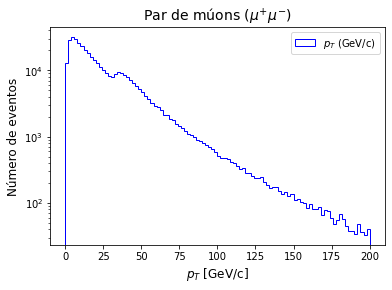

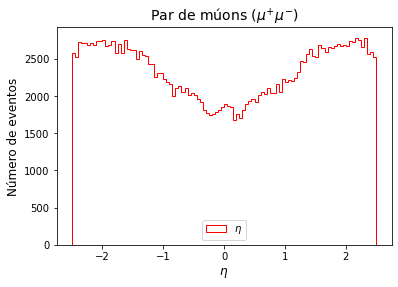

In [66]:
import matplotlib.pyplot as plt

# (p_T) do par de múons
plt.figure()
plt.hist(pt_dimu, bins=100, range=(0, 200), histtype='step', color='blue', label=r'$p_{T}$ (GeV/c)')
plt.xlabel(r'$p_{T}$ [GeV/c]', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.yscale('log')
plt.title(r'Par de múons ($\mu^{+}\mu^{-}$)', fontsize=14)
plt.legend()
plt.grid(False)
plt.show()

# (eta) do par de múons
plt.figure()
plt.hist(eta_dimu, bins=100, range=(-2.5, 2.5), histtype='step', color='red', label=r'$\eta$')
plt.xlabel(r'$\eta$', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title(r'Par de múons ($\mu^{+}\mu^{-}$)', fontsize=14)
plt.legend()
plt.grid(False)
plt.show()

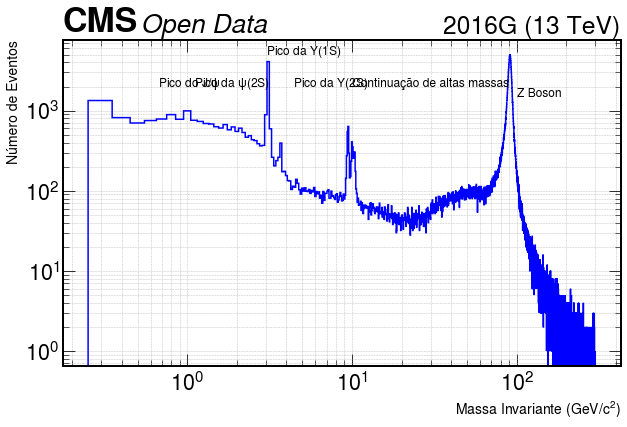

In [67]:
import matplotlib.pyplot as plt
import mplhep as hep

# Ajustar o estilo para o CMS
plt.figure(figsize=(10, 6))
hep.style.use('CMS')

# Plotar o histograma da massa invariante
plt.hist(mass_dimu, bins=3000, range=(0.25, 300), histtype='step', color='blue', linewidth=1.5)
hep.cms.label(data=True, label='Open Data', year="2016G", com=13)

# Configurações do gráfico
plt.xlabel(r"Massa Invariante (GeV/$c^2$)", fontsize=14)
plt.ylabel("Número de Eventos", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando legendas no gráfico com correções de coordenadas e texto
plt.text(0.66, 2.0e3, r'Pico do J/$\psi$', fontsize=12, color='black')
plt.text(1.10, 2.0e3, r'Pico da $\psi(2S)$', fontsize=12, color='black')
plt.text(3.00, 5.0e3, r'Pico da $\Upsilon(1S)$', fontsize=12, color='black')
plt.text(4.40, 2.0e3, r'Pico da $\Upsilon(2S)$', fontsize=12, color='black')
plt.text(10.0, 2.0e3, r'Continuação de altas massas', fontsize=12, color='black')
plt.text(100.0, 1.5e3, r'Z Boson', fontsize=12, color='black')

# Mostrar o gráfico
plt.show()

In [68]:
# Criação do dicionário muon_data
muon_data = {
    'num_final_events': num_events_after_cuts,
    'muon1_pt': ((muon1_pt_cut)),
    'muon1_eta': ((muon1_eta_cut)),
    'muon1_phi': ((muon1_phi_cut)),
    'muon2_pt': ((muon2_pt_cut)),
    'muon2_eta': ((muon2_eta_cut)),
    'muon2_phi': ((muon2_phi_cut)),
    'pt_dimu': ((pt_dimu)),
    'eta_dimu': ((eta_dimu)),
    'mass_dimu': ((mass_dimu))

}
# Criar um DataFrame com o dicionário
muon_df = pd.DataFrame(muon_data)

# Visualizar as primeiras linhas do DataFrame
print(muon_df.head())

# Salvar o DataFrame em um arquivo CSV (opcional)
muon_df.to_csv('muon_data.csv', index=False)

   num_final_events   muon1_pt  muon1_eta  muon1_phi   muon2_pt  muon2_eta  \
0            403907  52.556774  -1.429199  -2.723145  42.794273  -1.901611   
1            403907  50.203129  -0.656128   1.626221  38.603405  -1.013428   
2            403907  53.714878   0.159729  -1.947510  24.182121  -1.295410   
3            403907  48.502796  -1.802002   1.400146  35.413570  -0.882812   
4            403907  43.287487  -0.061668   1.378662  39.567261   0.787109   

   muon2_phi    pt_dimu  eta_dimu  mass_dimu  
0   1.170410  36.169895 -2.605601  91.075134  
1  -1.705811  14.304790 -2.441076  89.062180  
2   1.250244  29.602020 -0.942909  91.994675  
3  -1.836670  13.670808 -3.263883  91.716125  
4  -1.753174   3.742076  2.836087  90.336884  


In [69]:
styled_df = muon_df.head().style.background_gradient(cmap='plasma').set_caption("Muon Subset Data (Primeiras 5 Linhas)")
styled_df

,num_final_events,muon1_pt,muon1_eta,muon1_phi,muon2_pt,muon2_eta,muon2_phi,pt_dimu,eta_dimu,mass_dimu
0,403907,52.556774,-1.429199,-2.723145,42.794273,-1.901611,1.170410,36.169895,-2.605601,91.075134
1,403907,50.203129,-0.656128,1.626221,38.603405,-1.013428,-1.705811,14.304790,-2.441076,89.062180
2,403907,53.714878,0.159729,-1.947510,24.182121,-1.295410,1.250244,29.602020,-0.942909,91.994675
3,403907,48.502796,-1.802002,1.400146,35.413570,-0.882812,-1.836670,13.670808,-3.263883,91.716125
4,403907,43.287487,-0.061668,1.378662,39.567261,0.787109,-1.753174,3.742076,2.836087,90.336884


In [71]:
# Criação do dicionário muon_data
muon_data = {
    'num_final_events': np.array([num_events_after_cuts] * len(muon1_pt_cut), dtype=np.int32),
    'muon1_pt': np.array(muon1_pt_cut, dtype=np.float32),
    'muon1_eta': np.array(muon1_eta_cut, dtype=np.float32),
    'muon1_phi': np.array(muon1_phi_cut, dtype=np.float32),
    'muon2_pt': np.array(muon2_pt_cut, dtype=np.float32),
    'muon2_eta': np.array(muon2_eta_cut, dtype=np.float32),
    'muon2_phi': np.array(muon2_phi_cut, dtype=np.float32),
    'pt_dimu': np.array(pt_dimu, dtype=np.float32),
    'eta_dimu': np.array(eta_dimu, dtype=np.float32),
    'mass_dimu': np.array(mass_dimu, dtype=np.float32)
}

muon_df = pd.DataFrame(muon_data)
print(muon_df.head())  
with uproot.recreate("muon_data_tree.root") as file:
    file["tree"] = muon_data  # Salva o dicionário como uma tree

print("Arquivo ROOT salvo com sucesso!")

   num_final_events   muon1_pt  muon1_eta  muon1_phi   muon2_pt  muon2_eta  \
0            403907  52.556774  -1.429199  -2.723145  42.794273  -1.901611   
1            403907  50.203129  -0.656128   1.626221  38.603405  -1.013428   
2            403907  53.714878   0.159729  -1.947510  24.182121  -1.295410   
3            403907  48.502796  -1.802002   1.400146  35.413570  -0.882812   
4            403907  43.287487  -0.061668   1.378662  39.567261   0.787109   

   muon2_phi    pt_dimu  eta_dimu  mass_dimu  
0   1.170410  36.169895 -2.605601  91.075134  
1  -1.705811  14.304790 -2.441076  89.062180  
2   1.250244  29.602020 -0.942909  91.994675  
3  -1.836670  13.670808 -3.263883  91.716125  
4  -1.753174   3.742076  2.836087  90.336884  
Arquivo ROOT salvo com sucesso!
